### Задание 7 (2 балла)
Вам предлагается реализовать алгоритм аппроксимации функции синус с помощью метода [МНК](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2)

$$f(x)=sin(x), x \in [-180, 180]$$

* Вам необходимо будет аппроксимировать функцию на этом отрезке.
* Сформировать обучающее и тестовое множества самостоятельно.
* Использовать готовую реализацию из numpy в пунктах 1 и 2 - нельзя.
* Оценку времени выполнять из 10 запусков.
* При построении графиков, вам необходимо учитывать все 10 запусков (отразить дисперсию, "график с трубой")
* Кроссвалидацию делать необязательно
* Помните про радианы и градусы


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [3]:
points_num = 100

In [4]:
def plot_graph_with_sample(x_sample, 
                           y_sample,
                           title,
                           label =[],
                           x = [],
                           y = [],
                           colors = ['red', 'green', 'blue', 'cyan'],
                           labels = [],
                           is_grid_need = True):
    
    plt.figure(figsize=(12,8))
    
    
    plt.scatter(x_sample, y_sample, color = 'orange', label = 'sample')
    
    grid = np.linspace(-np.pi, np.pi, points_num)
    x.append(grid)
    y.append(np.sin(grid))
    labels.append('sin function')
    
    for x_cur, y_cur, cur_color, cur_label in zip(x, y, colors, labels):
        plt.plot(x_cur, y_cur, color = cur_color, label = cur_label)
       

    plt.legend()
    if is_grid_need:
        plt.grid()
        
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x) value')

#### 0. Создайте данные для решения задачи (0,1)

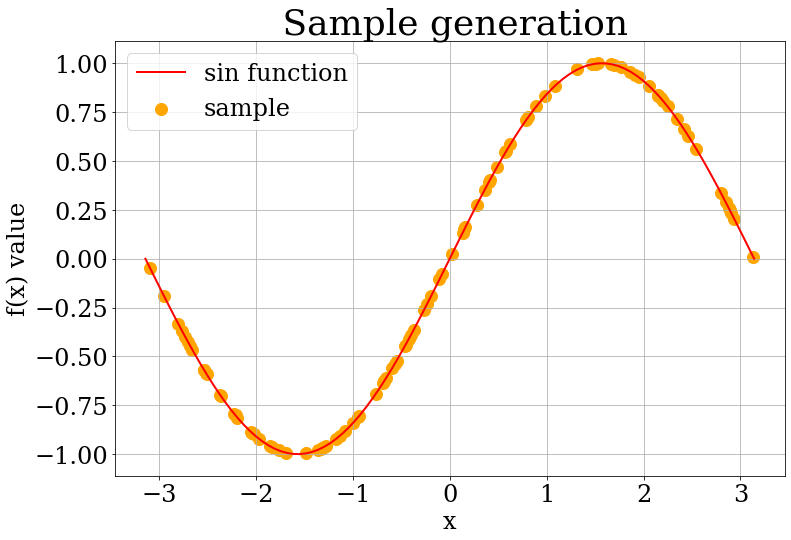

In [5]:
x_sample = np.random.rand(points_num) * 2 * np.pi - np.pi
y_sample = np.sin(x_sample)

plot_graph_with_sample(x_sample, y_sample, ' Sample generation')

#### 1. Реализуйте МНК с помощью numpy (0,2)
Реализуйте и протестируйте, постройте график, показывающий реальное значение функции и аппроксимацию

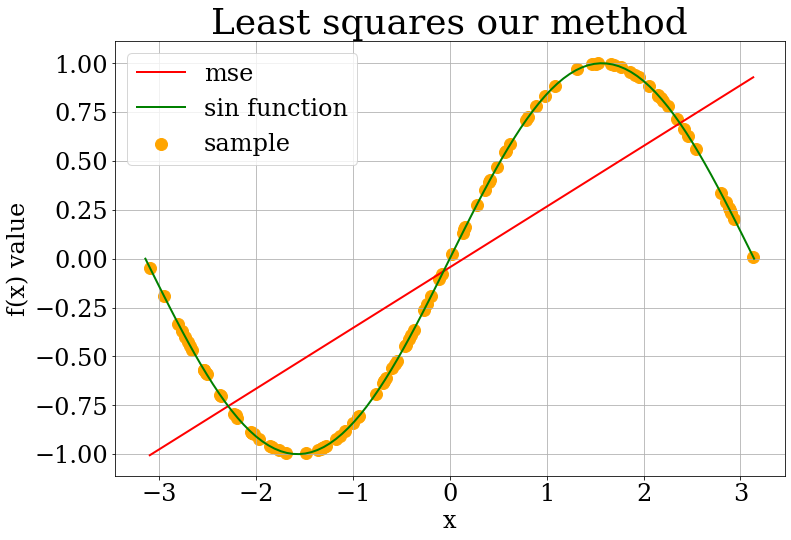

In [6]:
def our_lstsq(x_sample, y_sample):
    n = len(x_sample)
    X = np.vstack((x_sample, np.ones(n))).T

    return np.linalg.inv(X.T @ X) @ X.T @ y_sample
    
    
a, b = our_lstsq(x_sample, y_sample)
x_mse = np.sort(x_sample)
y_mse = a * x_mse + b

plot_graph_with_sample(x_sample, y_sample, 
                      x = [x_mse], y = [y_mse], 
                       labels = ['mse'], title = 'Least squares our method')

#### 2. Реализуйте МНК с помощью numpy и cdef (0,3)
Реализуйте и протестируйте, постройте график, показывающий реальное значение функции и аппроксимацию

In [7]:
%load_ext Cython

In [8]:
%%cython --annotate
cimport numpy as np
from numpy import vstack, ones, linalg


def cython_lstsq(x_sample, y_sample):
    cdef int n = x_sample.shape[0]
    cdef np.ndarray X = vstack((x_sample, ones(n))).T
    return linalg.inv(X.T @ X) @ X.T @ y_sample

In [9]:
%%cython
from __main__ import cython_lstsq
from __main__ import plt, x_sample, y_sample, np

a, b = cython_lstsq(x_sample, y_sample)

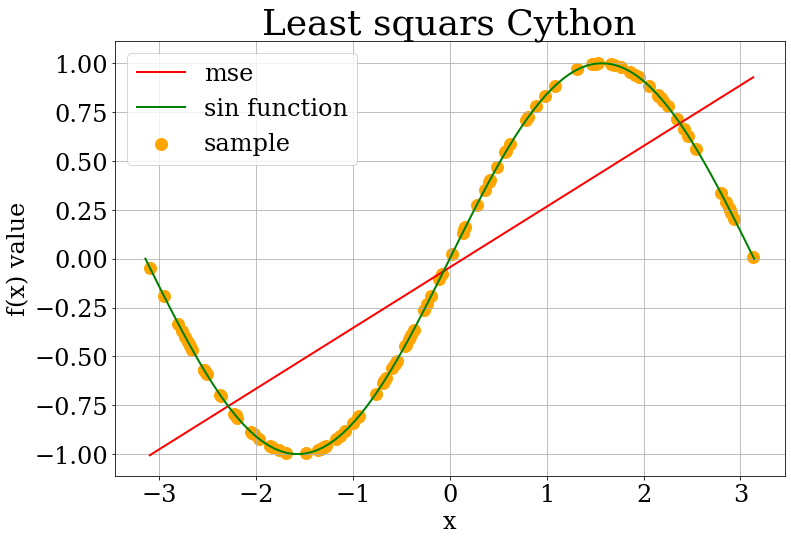

In [10]:
x_mse = np.sort(x_sample)
y_mse = a * x_mse + b

plot_graph_with_sample(x_sample, y_sample, 
                      x = [x_mse], y = [y_mse], 
                       labels = ['mse'], title = 'Least squars Cython')

#### 3. Реализуйте МНК с помощью c extensions (0,4)
Реализуйте и протестируйте, постройте график, показывающий реальное значение функции и аппроксимацию

In [11]:
# TODO

#### 4. Сравните время работы (0,1)
Сравните время работы реализаций из пунктов "1. Реализуйте МНК с помощью numpy", "2. Реализуйте МНК с помощью numpy и cdef" и "3. Реализуйте МНК с помощью c extensions"

In [20]:
%%timeit
a, b = our_lstsq(x_sample, y_sample)

31.8 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit
a, b = cython_lstsq(x_sample, y_sample)

30.6 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### 5. Сделайте выводы по полученным оценкам времени (0,3):
В частности, ответить на вопросы:
1. Увеличилось ли время при использовании cdef в сравнении с numpy? - Почему? **(0,1)**
2. Как влияет c extensions на производительность? **(0,1)**
3. Сравните c extensions и вашу numpy реализацию. **(0,1)**

**Вывод:**

1. Ощутимого прироста или замедления нет(хотя я запускал ячейки несоклько раз). Это кажется справедливым, потому что мы писали доовльно оптимизированный numpy код(который работает на C).
2. TODO
3. TODO

#### 6. Сделайте профилирование (0,4)
1. Сделайте профилирование реализации из пункта 1, можно ли как-то ускорить? **(0,2)**
1. Сделайте профилирование реализации из пункта 2, можно ли как-то ускорить? **(0,2)**

In [14]:
import cProfile, pstats, io

def get_profile(lstsq_method):
    pr = cProfile.Profile()
    pr.enable()
    
    a, b = lstsq_method(x_sample, y_sample)
    pr.disable()

    s = io.StringIO()
    ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
    ps.print_stats()

    print(s.getvalue())

In [15]:
get_profile(our_lstsq)

         50 function calls (48 primitive calls) in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-5d02a77bdc5b>:1(our_lstsq)
      5/3    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(vstack)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.7/site-packages/numpy/core/shape_base.py:224(vstack)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(inv)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.7/site-packages/numpy/linalg/linalg.py:482(inv)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
        1    0.000    0.000  

In [16]:
get_profile(cython_lstsq)

         49 function calls (47 primitive calls) in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {_cython_magic_0f69b2a28f2d5bf774595244680d0993.cython_lstsq}
      5/3    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(vstack)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.7/site-packages/numpy/core/shape_base.py:224(vstack)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(inv)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.7/site-packages/numpy/linalg/linalg.py:482(inv)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.7/site-packages/numpy/core/numeri

**Вывод:** Кажется ускорить код невозможно


#### 7. Используйте готовую реализацию МНК из numpy / scipy (0,1)
Протестируйте, постройте график, показывающий реальное значение функции и аппроксимацию.

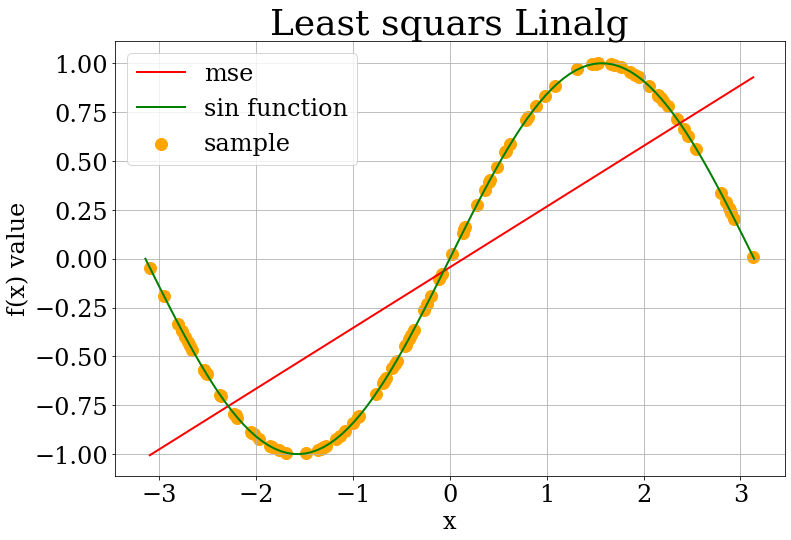

In [17]:
X = np.vstack((x_sample, np.ones(len(x_sample)))).T
y = y_sample
a, b = np.linalg.lstsq(X, y, rcond=None)[0]

x_mse = np.sort(x_sample)
y_mse = a * x_mse + b

plot_graph_with_sample(x_sample, y_sample, 
                      x = [x_mse], y = [y_mse], 
                       labels = ['mse'], title = 'Least squars Linalg')

In [18]:
%%timeit

a, b = np.linalg.lstsq(X, y, rcond=None)[0]

33.3 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### 8. Выводы (0,1)
Резюмируйте и сделайте выводы относительно проведенных экспериментов

In [19]:
#TODO